In [4]:
import os
import requests
import matplotlib.ticker as tick
import io
import numpy as nump
import zipfile as zf
import shutil
import matplotlib.pyplot as plypt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [5]:
curr_dir = os.getcwd()
for year in range(2000, 2010, 1):
    res = requests.get('https://static.nhtsa.gov/nhtsa/downloads/FARS/{0}/National/FARS{0}NationalCSV.zip'.format(year))
    zip = zf.ZipFile(io.BytesIO(res.content))
    path = os.path.join(curr_dir,'data',str(year))
    zip.extractall(path)


dir = "accident_all_years"
path = os.path.join(curr_dir, dir)
os.mkdir(path)

for year in range(2000, 2010, 1):
    apath = os.path.join(curr_dir,'data',str(year),'ACCIDENT.csv')
    mpath = os.path.join(curr_dir,'accident_all_years',str(year)+'_accident.csv')
    shutil.copy(apath, mpath)

FileNotFoundError: ignored

Recreate data analysis in a published paper.

Task: Recreate the graph (with actual FARS data) in Figure 15.

In [ ]:
# path=('accident_all_years/2004_accident.csv')
df = pd.DataFrame()

for year in range(2004,2010,1):
    apath = 'accident_all_years/{0}_accident.csv'.format(year)
    df1 = pd.read_csv(apath,encoding='latin-1')
    df = pd.concat([df, df1], axis=0)

df = df.reset_index(drop = True)

# pedestrians
df_ped = df[df['HARM_EV'] == 8]

kansas = df_ped[df_ped['STATE'] == 20]

In [6]:
# US Speed Limit to Fatal Pedestrian Crashes 
us_spd_limit = df_ped[['SP_LIMIT', 'FATALS']]

speed_us = us_spd_limit.groupby('SP_LIMIT')['FATALS'].sum()
us_speed_dict = {'30 mph or less': 0,
                '30 or 40 mph' : 0,
                '45 or 50 mph' : 0,
                '55 mph' : 0,
                '60 mph or higher': 0   }
fatal_crashes_us = 0
for index in speed_us.index:
    if int(index) in range(0, 31):
        us_speed_dict['30 mph or less'] += speed_us[index]
    elif int(index) in range(31, 41):
        us_speed_dict['30 or 40 mph'] += speed_us[index]
    elif int(index) in range(41, 51):
        us_speed_dict['45 or 50 mph'] += speed_us[index]
    elif int(index) in range(51, 60):
        us_speed_dict['55 mph'] += speed_us[index]
    else:
        us_speed_dict['60 mph or higher'] += speed_us[index]
    fatal_crashes_us += speed_us[index]

speedpcnt_us = {k:(us_speed_dict[k]/fatal_crashes_us)*100 for k in us_speed_dict}

NameError: ignored

In [ ]:
# Kansas Speed Limit to Fatal Pedestrian Crashes 
kansas_speed_limit = kansas[['SP_LIMIT', 'FATALS']]

speed_kansas = kansas_speed_limit.groupby('SP_LIMIT')['FATALS'].sum()
kansas_speed_dict = {'30 mph or less': 0,
                    '30 or 40 mph' : 0,
                    '45 or 50 mph' : 0,
                    '55 mph' : 0,
                    '60 mph or higher': 0}
fatal_crashes_kansas = 0
for index in speed_kansas.index:
    if int(index) in range(0, 31):
        kansas_speed_dict['30 mph or less'] += speed_kansas[index]
    elif int(index) in range(31, 41):
        kansas_speed_dict['30 or 40 mph'] += speed_kansas[index]
    elif int(index) in range(41, 51):
        kansas_speed_dict['45 or 50 mph'] += speed_kansas[index]
    elif int(index) in range(51, 60):
        kansas_speed_dict['55 mph'] += speed_kansas[index]
    else:
        kansas_speed_dict['60 mph or higher'] += speed_kansas[index]
    fatal_crashes_kansas += speed_kansas[index]

speedpcnt_kansas = {k:(kansas_speed_dict[k]/fatal_crashes_kansas)*100 for k in kansas_speed_dict}

NameError: ignored

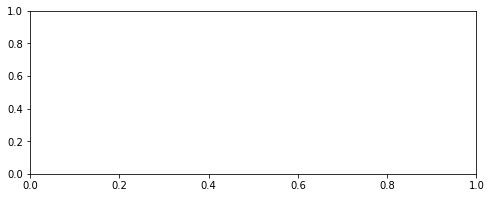

In [3]:
fig, ax = plypt.subplots(figsize = (8, 3))
x_axis = list(us_speed_dict.keys()) # X axis labels
x = nump.arange(len(x_axis))
y1, y2 = list(speedpcnt_us.values()), list(speedpcnt_kansas.values())
ax.bar(x-0.2, y2, 0.4, label = 'Kansas', color='blue')
ax.bar(x+0.2, y1, 0.4, label = 'USA', color='red')
ax.yaxis.set_major_formatter(tick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plypt.xlabel("Speed"), plypt.ylabel("Percentage of fatal crashes")
plypt.title("Fatal pedestrian crashes based on speed limit")
plypt.xticks(x, x_axis)
plypt.show()

Task: Recreate Figure 4 and Figure 9.

In [ ]:
# copy person.csv to person_all_years
dir = "person_all_years"
path = os.path.join(curr_dir, dir)
os.mkdir(path)

for year in range(2000, 2010, 1):
    person_path = os.path.join(curr_dir,'data',str(year),'PERSON.csv')
    mpath = os.path.join(curr_dir,'person_all_years',str(year)+'_person.csv')
    shutil.copy(person_path, mpath)

In [ ]:
df_person = pd.DataFrame()

for year in range(2004,2010,1):
    person_path = 'person_all_years/{0}_person.csv'.format(year)
    df1 = pd.read_csv(person_path,encoding='latin-1')
    df_person = pd.concat([df_person, df1], axis=0)

df_person = df_person.reset_index(drop = True)

# pedestrians
df_ped_person = df_person[df_person['HARM_EV'] == 8]

df_ped_person = df_ped_person[df_ped_person['DEATH_YR'].isin(range(2004, 2010))]

df_ped_person_kansas = df_ped_person[df_ped_person['STATE'] == 20]
df_ped_person_kansas['CATEGORY'] = pd.cut(df_ped_person_kansas['AGE'], 
                                        bins=[0, 16, 24, 34, 44, 54, 64, 99],
                                        include_lowest=True, 
                                        labels=['<16', '16-24', '25-34', '35-44', '45-54', '55-64', 'more than 65 years'])

group_age_year = df_ped_person_kansas.groupby(["DEATH_YR", "CATEGORY"])["CATEGORY"].count()

age_category_count = group_age_year.to_frame().rename(columns = {'CATEGORY':'CAT_COUNT'}).reset_index()

Figure 4

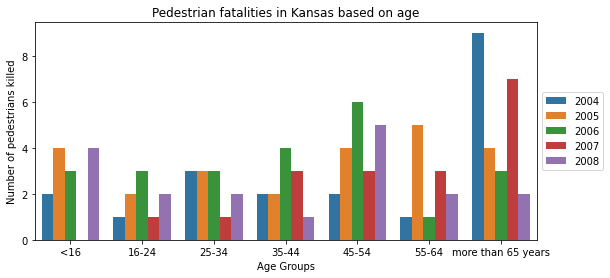

In [ ]:
plypt.figure(figsize = (9, 4))
plypt.title("Pedestrian fatalities in Kansas based on age")
sns.barplot(data = age_category_count, x = "CATEGORY", y = "CAT_COUNT", hue = "DEATH_YR")
plypt.xlabel("Age Groups")
plypt.ylabel("Number of pedestrians killed")
plypt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plypt.show()

In [ ]:
# Comparison of fatal pedestrian crashes between Kansas and USA based on time of the day.
# USA
usa_time_df = df_ped_person[['HOUR']]
usa_time_df["HOUR_CATEGORY"] = pd.cut(usa_time_df['HOUR'], 
                                bins=[0, 6, 9, 15, 18, 21, 24],
                                include_lowest=True, 
                                labels=['Midnight to 5:59 am',
                                    '6 am to 8:59 am',
                                    '9 am to 2:59 am',
                                    '3 pm to 5:59 pm',
                                    '6 pm to 8:59 pm',
                                    '9 pm to 11:59 pm'])
usa_group_time = usa_time_df['HOUR_CATEGORY'].value_counts(sort = False).to_frame()

In [ ]:
# Kansas
kansas_time_df = df_ped_person[['HOUR']][df_ped_person['STATE'] == 20]
kansas_time_df["HOUR_CATEGORY"] = pd.cut(kansas_time_df['HOUR'], 
                                        bins=[0, 6, 9, 15, 18, 21, 24],
                                        include_lowest=True, labels=['Midnight to 5:59 am',
                                        '6 am to 8:59 am',
                                        '9 am to 2:59 am',
                                        '3 pm to 5:59 pm',
                                        '6 pm to 8:59 pm',
                                        '9 pm to 11:59 pm'])
kansas_group_time = kansas_time_df['HOUR_CATEGORY'].value_counts(sort = False).to_frame()
kansas_group_time

,HOUR_CATEGORY
Midnight to 5:59 am,29
6 am to 8:59 am,6
9 am to 2:59 am,16
3 pm to 5:59 pm,14
6 pm to 8:59 pm,24
9 pm to 11:59 pm,12


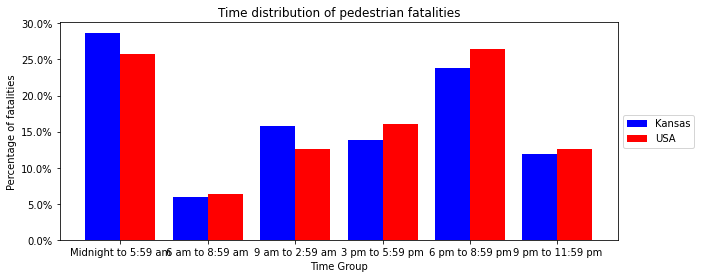

In [ ]:
from turtle import color

figure, ax = plypt.subplots(figsize = (10, 4))
x_labels = usa_group_time.index.tolist() # X axis labels
x = nump.arange(len(x_labels))
y1 = (kansas_group_time['HOUR_CATEGORY']/kansas_group_time['HOUR_CATEGORY'].sum())*100
y2 = (usa_group_time['HOUR_CATEGORY']/usa_group_time['HOUR_CATEGORY'].sum())*100

plypt.xlabel("Time Group"), plypt.ylabel("Percentage of fatalities")
plypt.title("Time distribution of pedestrian fatalities")
plypt.xticks(x, x_labels)

ax.bar(x-0.2, y1, 0.4, label = 'Kansas', color='blue')
ax.bar(x+0.2, y2, 0.4, label = 'USA', color='red')
ax.yaxis.set_major_formatter(tick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

plypt.show()

 Task: Take the data from Figure 4 and Figure 9 and combine them.

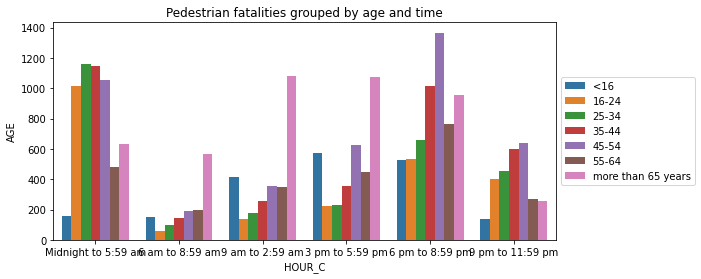

In [ ]:
age_time = df_ped_person[['AGE', 'HOUR']]


age_time["HOUR_C"] = pd.cut(age_time['HOUR'], 
                            bins=[0, 6, 9, 15, 18, 21, 24],
                            include_lowest=True,
                            labels=['Midnight to 5:59 am',
                                '6 am to 8:59 am',
                                '9 am to 2:59 am',
                                '3 pm to 5:59 pm',
                                '6 pm to 8:59 pm',
                                '9 pm to 11:59 pm'])

age_time['AGE_C'] = pd.cut(age_time['AGE'], 
                            bins=[0, 16, 24, 34, 44, 54, 64, 99],
                            include_lowest=True, 
                            labels=['<16', '16-24', '25-34', '35-44', '45-54', '55-64', 'more than 65 years'])
                            
counts_agetime = age_time.groupby(['AGE_C', 'HOUR_C']).count().reset_index()

plypt.figure(figsize = (9, 4))
plypt.xlabel("Time Group")
plypt.ylabel("Number of pedestrians involved")
plypt.title("Pedestrian casualities grouped by age and time")
sns.barplot(data = counts_agetime, x = "HOUR_C", y = "AGE", hue = "AGE_C")
plypt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plypt.show()

 Perform cluster analysis on NHTSA FARS data.

 Task: Reshape the US dataset from HW1

In [ ]:
curr_dir = os.getcwd()
for year in range(1975, 2021, 5):
    res = requests.get('https://static.nhtsa.gov/nhtsa/downloads/FARS/{0}/National/FARS{0}NationalCSV.zip'.format(year))
    zip = zf.ZipFile(io.BytesIO(res.content))
    path = os.path.join(curr_dir,'data1',str(year))
    zip.extractall(path)

dir = "accident_all_years1"
path = os.path.join(curr_dir, dir)
os.mkdir(path)

for year in range(1975,2021,5):
    apath = os.path.join(curr_dir,'data1',str(year),'ACCIDENT.csv')
    mpath = os.path.join(curr_dir,'accident_all_years1',str(year)+'_accident.csv')
    shutil.copy(apath, mpath)

In [ ]:
# you are using data from the 1975-2020 that you found in HW1
df = pd.DataFrame()

for year in range(1975,2021,5):
    apath = 'accident_all_years1/{0}_accident.csv'.format(year)
    df1 = pd.read_csv(apath,encoding='latin-1')
    df = pd.concat([df, df1], axis=0)

df_ped = df[(df['HARM_EV'] == 8)]

# restrict to numeric features, eliminate year as a feature
df_ped = df_ped._get_numeric_data()
df_ped = df_ped.dropna(axis = 1)

# you are including all states data except Kansas
df_kansas = df_ped[(df_ped['STATE'] == 20)]
df_US = df_ped[(df_ped['STATE']) != 20]
state = df_US[['STATE']]


In [ ]:
# scale the data using scikit-learn Standard Scaler
state = df_US[['STATE']]
df_US = df_US.drop(columns = ['HARM_EV', 'STATE', 'COUNTY'])
kansas_df = df_kansas.drop(columns = ['HARM_EV', 'STATE', 'COUNTY'])

scaler = StandardScaler()
scaler.fit(df_US)
US_scaled = scaler.transform(df_US)

Task: Perform ad hoc K-Means clustering

In [ ]:
K = [5, 10, 12]
sum_squares = []
for k in K:
    k_mean_clustering = KMeans(n_clusters = k, init='k-means++', max_iter = 200, n_init = 10, random_state = 0)
    k_mean_clustering.fit(US_scaled)
    sum_squares.append(k_mean_clustering.inertia_)
    print("Cluster {0} Centroids".format(k))
    print(k_mean_clustering.cluster_centers_)
    print("---------------------------------\n")

Cluster 5 Centroids
[[-1.78503012e-02 -7.32176650e-03  2.53595036e-02 -8.38087299e-03
   9.72631179e-03  2.65401354e-02  5.40209221e-02 -5.09042457e-02
  -1.33655684e-02 -1.25283453e-02 -4.07213793e-02 -1.82282317e-02
  -1.07046951e+00 -1.02668102e+00 -1.04067716e+00 -9.70996191e-01
  -1.16187067e-01  6.25723733e-03  6.92357831e-02  1.16853944e-01
  -4.15684136e-02]
 [ 2.92739824e-02  8.02440526e-03  1.15904469e+00  1.64696356e-02
   5.71438308e-02  1.46191231e-01 -4.15989297e-01 -4.55983032e-02
  -1.33655684e-02  7.62723206e-02  1.26222178e-01  1.98308509e-01
   8.18581023e-01  7.83683206e-01  8.90268156e-01  8.26527713e-01
  -1.16187067e-01 -5.09774924e-02  3.90979527e-02 -1.43097118e-01
  -9.80689867e-03]
 [-1.58878535e-03  7.52442882e-02 -2.64004998e-01  1.08309866e-02
  -1.74786357e-02  1.79757245e-01  9.58602210e-01  2.83373191e+00
  -1.33655684e-02  1.78326670e-01  8.86558980e-02  8.41030024e-02
  -6.84119275e-03 -1.44081061e-02  6.96374086e-03 -1.99168609e-02
   6.31276816e+00 

Task: Perform elbow analysis to find optimal cluster size

In [ ]:
max_clusters = 15
css = [] 

for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
    kmeans.fit(US_scaled) # where d is the dataset you have standardized in the first part of this
    css.append(kmeans.inertia_)

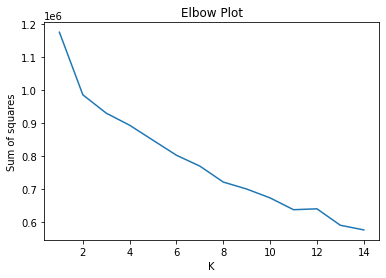

In [ ]:
plypt.plot(range(1,max_clusters), css)
plypt.xlabel("K"), plypt.ylabel("Sum of squares")
plypt.title("Elbow Plot")
plypt.show()

In [ ]:
kansas_labels = kmeans.predict(scaler.transform(df_kansas))
mode_label = st.mode(kansas_labels)[0][0]
print(f"Kansas would belong to the cluster: {mode_label}")

state['Labels'] = kmeans.predict(US_scaled)
state_count = state.groupby(['STATE','Labels'])['Labels'].count().sort_values().groupby(level=0).tail(1).to_frame()
state_count = state_count.rename(columns = {"Labels":"Labels_Count"}).reset_index()


kansas_like = state_count['STATE'][state_count['Labels'] == mode_label]
print('\n-------------------------------------------')
print("The states which are most like Kansas are:")
print('-------------------------------------------')
print(kansas_like.to_string(index = False))
print('-------------------------------------------')

In [ ]:
def plot_dendrogram(model, **kwargs):
    cts = nump.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        c_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                c_count += 1 # leaf node
            else:
                c_count += cts[child_idx - n_samples]
        cts[i] = c_count

    linkage_matrix = nump.column_stack([model.children_, model.distances_, cts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


aggmodel = AgglomerativeClustering(distance_threshold=None, n_clusters=10, compute_distances = True)
aggmodel = aggmodel.fit(US_scaled)

In [ ]:
plypt.figure(figsize = (14, 6))
plypt.title("Dendrogram")
plot_dendrogram(aggmodel, truncate_mode="level", p=3)
plypt.xlabel("Number of points in node.")
plypt.show()